# 💬 Sentiment Analysis with NLP
### Internship Task 2 - Machine Learning (EliteTech)

This notebook performs sentiment analysis using **Logistic Regression** on a dataset of customer reviews. It includes:
- Data Preprocessing
- TF-IDF Vectorization
- Logistic Regression Modeling
- Evaluation Metrics and Definitions
- Interactive Sentiment Prediction
- Scope for Improvement

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from ipywidgets import interact, widgets

import warnings
warnings.filterwarnings('ignore')


In [63]:
import urllib.request
from sklearn.utils import resample

# Load dataset
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
response = urllib.request.urlopen(url)
df = pd.read_csv(response)
df = df[['label', 'tweet']]
df = df.rename(columns={"label": "sentiment", "tweet": "text"})
df['sentiment'] = df['sentiment'].map({0: 'Negative', 1: 'Positive'})

# Balance the dataset
df_majority = df[df.sentiment == 'Negative']
df_minority = df[df.sentiment == 'Positive']

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df = pd.concat([df_majority_downsampled, df_minority])
df = df.sample(frac=1).reset_index(drop=True)

print(df['sentiment'].value_counts())
df.head()


Positive    2242
Negative    2242
Name: sentiment, dtype: int64


,sentiment,text
0,Positive,great speech war veteran #iraq #war #profit ...
1,Positive,'@user the #14th amendment #blm discussed he...
2,Negative,@user stop acting so small! you are the unive...
3,Positive,"you are invited, you can help.700+ actions fo..."
4,Positive,i live in nyc and don't see a lot of ove racis...


In [64]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)          # Remove URLs
    text = re.sub(r"@\w+", "", text)                    # Remove mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)             # Keep only letters and spaces
    text = re.sub(r"\s+", " ", text).strip()            # Normalize spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,sentiment,text,clean_text
0,Positive,great speech war veteran #iraq #war #profit ...,great speech war veteran iraq war profit milit...
1,Positive,'@user the #14th amendment #blm discussed he...,the th amendment blm discussed here thanks
2,Negative,@user stop acting so small! you are the unive...,stop acting so small you are the universe in m...
3,Positive,"you are invited, you can help.700+ actions fo...",you are invited you can help actions for peace...
4,Positive,i live in nyc and don't see a lot of ove racis...,i live in nyc and dont see a lot of ove racism...


In [65]:
# Check value counts
print(df['sentiment'].value_counts())
print(df['sentiment'].unique())


Positive    2242
Negative    2242
Name: sentiment, dtype: int64
['Positive' 'Negative']


In [66]:
# Map 'Positive' and 'Negative' to binary values
df['label'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})


In [67]:
df.head()

,sentiment,text,clean_text,label
0,Positive,great speech war veteran #iraq #war #profit ...,great speech war veteran iraq war profit milit...,1
1,Positive,'@user the #14th amendment #blm discussed he...,the th amendment blm discussed here thanks,1
2,Negative,@user stop acting so small! you are the unive...,stop acting so small you are the universe in m...,0
3,Positive,"you are invited, you can help.700+ actions fo...",you are invited you can help actions for peace...,1
4,Positive,i live in nyc and don't see a lot of ove racis...,i live in nyc and dont see a lot of ove racism...,1


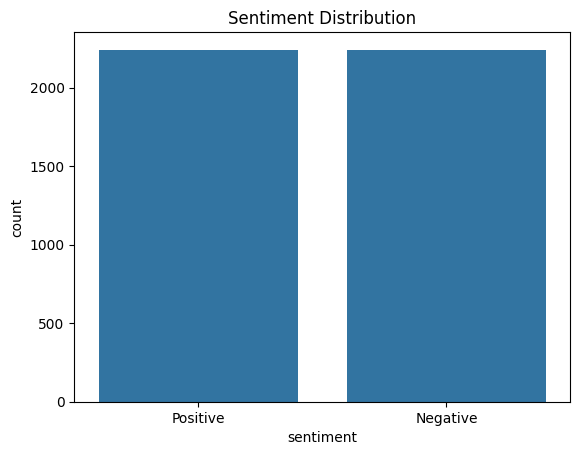

In [68]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [69]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)


ImportError: cannot import name '_to_object_array' from 'sklearn.utils' (c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\__init__.py)

In [44]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8472686733556298

Confusion Matrix:
 [[399  72]
 [ 65 361]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       471
           1       0.83      0.85      0.84       426

    accuracy                           0.85       897
   macro avg       0.85      0.85      0.85       897
weighted avg       0.85      0.85      0.85       897



### 📊 Evaluation Metrics Explained
- **Accuracy**: Correct predictions over total samples.
- **Precision**: Positive predictive value.
- **Recall**: True positive rate.
- **F1-Score**: Harmonic mean of precision and recall.


In [45]:
test_sentence = "I really love this product. It's excellent and useful!"
cleaned = clean_text(test_sentence)
vec = vectorizer.transform([cleaned])
print("Cleaned input:", cleaned)
print("Non-zero features in TF-IDF vector:", vec.nnz)


Cleaned input: i really love this product its excellent and useful
Non-zero features in TF-IDF vector: 5


In [ ]:
@interact(text=widgets.Textarea(
    value='I find this product very useful, excellent amazinf usefull handy cost effective, renewable',
    description='Your Review:',
    layout=widgets.Layout(width='500px', height='100px')
))
def predict_sentiment(text):
    try:
        clean = clean_text(text)
        vec = vectorizer.transform([clean])
        if vec.nnz == 0:
            print("⚠️ No recognizable features in input. Try using different wording.")
        else:
            pred = model.predict(vec)[0]
            label = 'Positive' if pred == 1 else 'Negative'
            print(f"🔍 Predicted Sentiment: {label}")

    except Exception as e:
        print("Error during prediction:", e)


interactive(children=(Textarea(value='I find this product very useful, excellent amazinf usefull handy cost ef…

### 🔧 Scope for Improvement
- Use deep learning models like LSTM or BERT for better performance.
- Apply more advanced preprocessing (lemmatization, POS tagging).
- Handle class imbalance with resampling techniques.
- Perform hyperparameter tuning using GridSearchCV.
